In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
from matplotlib import pyplot as plt

import neuralnet

The neuralnet folder creates a pytorch neural network. The values for the network can be modified there. The training and testing functions are also defined there. Running the model should be as easy as open the data file and running it through the model

In [2]:
data = pd.read_csv("train.csv")
data = data.sample(frac=1)

Isolate the features and labels

In [3]:
Ytrain = data.filter(items=["Status"])
Xtrain = data.drop("Status", axis=1)

In [4]:
print(Xtrain.dtypes)

Unnamed: 0               int64
AgatstonScore2D        float64
MassScore              float64
VolumeScore            float64
Area2D                 float64
                        ...   
ICskewnesstMomentH3    float64
ICkurtosisMomentH1     float64
ICkurtosisMomentH2     float64
ICkurtosisMomentH3     float64
Time                     int64
Length: 80, dtype: object


In [5]:
obj_df = Xtrain.select_dtypes(include=['object', 'string', 'bool']).copy()
obj_df.head()

,isAgZero,isLesion3DBelow5,isAgeBelow60,AgGroupX1,AgGroupX2,AgGroupX3,isArt2plus,isArt3plus
3089,True,True,True,False,False,False,False,False
3081,False,False,True,False,True,True,True,True
3012,False,False,True,False,True,True,True,True
2923,False,False,False,False,True,True,True,True
2167,True,True,True,False,False,False,False,False


We have some boolean values that need to be encoded; let's set the false values to 0 and the true values to 1s

In [6]:
Xtrain.replace({False: 0, True: 1}, inplace=True)

The `train` method in neuralnet.py automatically initializes a the model that is specified in the file, so we don't need to worry about doing this manually. We can just call the train method and it will train the network

In [7]:
# convert to numpy arrays
Xtrain = Xtrain.to_numpy()
Ytrain = Ytrain.to_numpy()

Final Loss: 0.4247022867202759


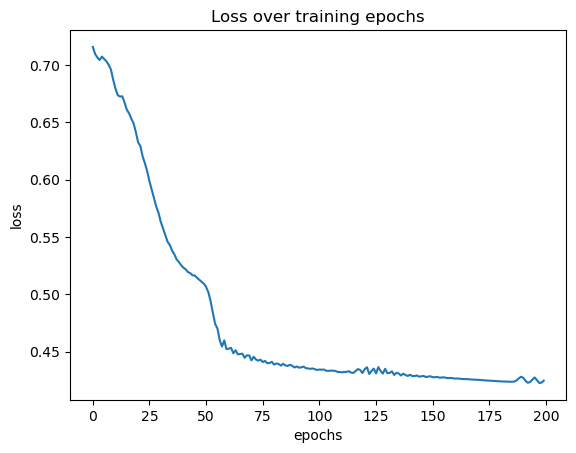

In [12]:
model, epochs, loss = neuralnet.train(Xtrain, Ytrain, num_epochs=200)

# plot the training
plt.plot(epochs, loss)
plt.title("Loss over training epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

Let's quickly test the model

In [13]:
test_data = pd.read_csv("test.csv")

# isolate X,Y
Xtest = test_data.drop("Status", axis=1)
Ytest = test_data.filter(items=["Status"])

# encode the booleans
Xtest.replace({False: 0, True: 1}, inplace=True)

# convert to numpy
Xtest = Xtest.to_numpy()
Ytest = Ytest.to_numpy()

In [14]:
# test
acc, preds = neuralnet.test(model, Xtest, Ytest)
print(f"Model Accuracy: {acc}")

# save the preds
preds = pd.DataFrame(preds)
preds["labels"] = Ytest
preds.to_csv("preds.csv")
preds.head()

Model Accuracy: 0.8434959053993225


,0,1,labels
0,0.988654,1.134593e-02,0
1,1.000000,1.003044e-09,0
2,1.000000,1.166258e-09,0
3,0.999821,1.789827e-04,0
4,0.562613,4.373870e-01,0


We know that our training set is 50/50 for each label. To make sure that we aren't just outputting one number, we can test against the training set. If we get an accuracy of .5, we know that there is just a specific value being outputted without the model learning any of the features.

In [11]:
acc, train_preds = neuralnet.test(model, Xtrain, Ytrain)
print(f"Model Accuracy: {acc}")

Model Accuracy: 0.9215686321258545
